# Smart insole activity modelling
 
In this notebook we analyse some time series data taken from the sensors on the insole and attempt to fit a predictive model to determine what kind of activity is being performed.

## Overview
### The data

The [../data](data) consists of timestamped sensor readings from the device. Timestamps are in ISO-8601 datetime format and sensor readings are integer values representing pressure (force) in kg.

Example: `2019-11-18T10:00:00.001,1,15`

Which is 15 kg from sensor number 1 at 2019-11-18T10:00:00.001.

### Analysis

We first want to develop some general techniques for locating trends, correlations and periodicity in the sensor data, and this will lead us to make appropriate modelling choices. We also want to uncover statistical distributions in the data which will enable us to generate fake data that looks similar; fake data is useful for integration testing.

In [2]:
# Preamble
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

# Data loading

In [4]:
pressure_data = pd.read_csv("../data/sample.csv", index_col=0, parse_dates=[0])

In [7]:
pressure_data.query('date != "NaT"')

,sensor,pressure
date,,
2019-11-18 10:00:00.001,1,15
2019-11-18 10:00:00.010,3,10
2019-11-18 10:00:00.024,2,30
2019-11-18 10:00:00.036,4,2
2019-11-18 10:00:00.102,1,10
2019-11-18 10:00:00.110,3,7
2019-11-18 10:00:00.132,2,23
2019-11-18 10:00:00.177,4,8
2019-11-18 10:00:01.001,1,15


# Data exploration

In [5]:
pressure_data.head()

,sensor,pressure
date,,
2019-11-18 10:00:00.001,1,15
2019-11-18 10:00:00.010,3,10
2019-11-18 10:00:00.024,2,30
2019-11-18 10:00:00.036,4,2
2019-11-18 10:00:00.102,1,10


In [6]:
pressure_data.dtypes

sensor      int64
pressure    int64
dtype: object

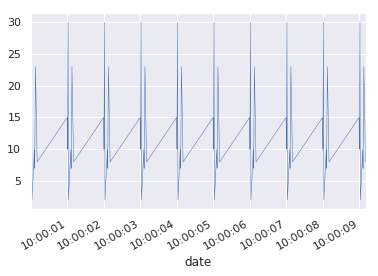

In [7]:
pressure_data['pressure'].plot(linewidth=0.5)